# Example 1

### Audio, Spectrogram, & AudioMoth Module Overview

In this example, we'll demonstrate how audio files can be loaded, processed, and visualized using OpenSoundscape.
Let's start with setting up the files we'll be working with and loading the modules we want from OpenSoundscape.

Here, we'll use two AudioMoth recordings as examples: one of several Winter Wren songs and another of 3 Northern Parula calls. Both recordings were collected by the Kitzes Lab in one of our field deployments.

In [1]:
# Import the relevant & helper modules.
from opensoundscape import Audio
from opensoundscape import Spectrogram
from opensoundscape import audiomoth
import matplotlib.pyplot as plt

In [2]:
# Download files
!python -m wget -O parula_2sec_call.WAV https://github.com/kitzeslab/demos-for-opso/blob/main/parula_example.WAV?raw=true
!python -m wget -O winterWren.WAV https://github.com/kitzeslab/demos-for-opso/blob/main/winterWren.WAV?raw=true

zsh:1: no matches found: https://github.com/kitzeslab/demos-for-opso/blob/main/parula_example.WAV?raw=true
zsh:1: no matches found: https://github.com/kitzeslab/demos-for-opso/blob/main/winterWren.WAV?raw=true


#### Previewing an audio file containing a winter wren song

In [3]:
path = 'winterWren.WAV'

In [4]:
# Here, we load in the audio from a given file location.
audio = Audio.from_file(path)
# Print our sound's duration and sample rate from the Audio object.
print(f"Audio is {audio.duration} seconds long and has a sample rate of {audio.sample_rate} Hz.")

Audio is 60.0 seconds long and has a sample rate of 32000 Hz.


What if we wanted to learn more about our recording, like the serial number of its recorder or when it was created? The opensoundscape.audiomoth module contains functionality to parse and view an audio file's metadata! For AudioMoth-produced files, it parses the comment to include information such as temperature, device ID, start time of recording, and gain setting as separate fields.

In [5]:
metadata = audiomoth.parse_audiomoth_metadata_from_path(path)
print(metadata)

{'artist': 'AudioMoth 240435085A34AA85', 'comment': 'opso_metadata{"artist": "AudioMoth 240435085A34AA85", "comment": "Recorded at 10:00:00 24/06/2021 (UTC) by AudioMoth 240435085A34AA85 at medium gain setting while battery state was 4.0V and temperature was 13.9C.", "samplerate": 32000, "format": "WAV", "frames": 230400000, "sections": 1, "subtype": "PCM_16", "recording_start_time": "2021-06-24T10:32:00+00:00", "gain_setting": "medium", "battery_state": 4.0, "device_id": "AudioMoth 240435085A34AA85", "temperature_C": 13.9, "channels": 1, "duration": 60.0, "filesize": NaN, "opso_metadata_version": "v0.1", "opensoundscape_version": "0.8.0"}', 'samplerate': 32000, 'format': 'WAV', 'frames': 1920000, 'sections': 1, 'subtype': 'PCM_16', 'recording_start_time': datetime.datetime(2021, 6, 24, 10, 0, tzinfo=datetime.timezone(datetime.timedelta(0), 'UTC')), 'gain_setting': 'medium', 'battery_state': 4.0, 'device_id': 'AudioMoth 240435085A34AA85', 'temperature_C': 13.9}


Now, let's visualize our sound as a spectrogram using OpenSoundscape's Spectrogram module - we can't learn much without a picture!

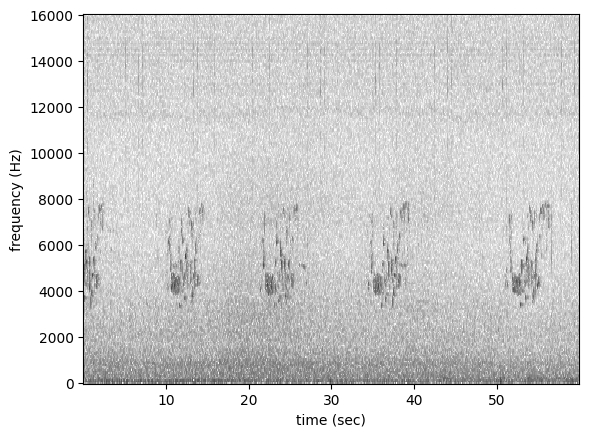

In [6]:
# Create spectrogram object from our previously loaded audio object and view it. 
spec = Spectrogram.from_audio(audio)
spec.plot()

Though we can see the whole soundscape visualized above, this spectrogram doesn't tell us much about the Winter Wren call that we want to investigate. Luckily, we can "zoom in" by choosing an interesting segment of audio to look at - like the last call in the recording between about 50 and 57 seconds!

In [7]:
# Get the desired segment of audio.
trimmed_audio = audio.trim(50, 57)#.resample(20000)
# Print new duration and sample rate.
print(f"Audio is {trimmed_audio.duration} seconds long and has a sample rate of {trimmed_audio.sample_rate} Hz.")

Audio is 7.0 seconds long and has a sample rate of 32000 Hz.


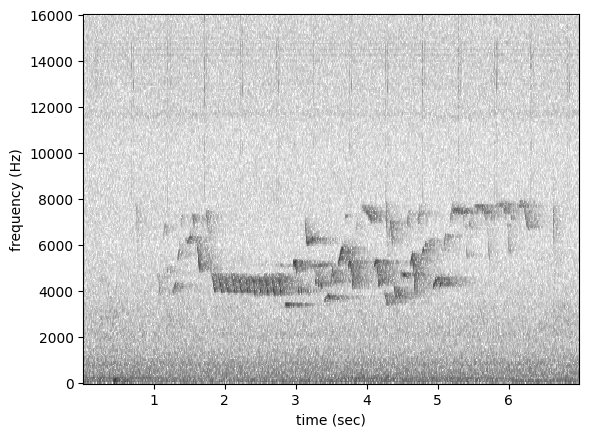

In [8]:
# Create spectrogram object from our previously loaded, trimmed audio object and view it. 
spec = Spectrogram.from_audio(trimmed_audio)
spec.plot()

The Audio module allows us to save new audio files as well - and the new files preserve the original metadata, updated to reflect any changes to the audio's duration!

In [9]:
trimmed_audio.save('wiwr_7sec_call.WAV')

In [10]:
audiomoth.parse_audiomoth_metadata_from_path('parula_2sec_call.WAV')

{'artist': 'AudioMoth 243B1F045D32042D',
 'comment': 'opso_metadata{"artist": "AudioMoth 243B1F045D32042D", "comment": "Recorded at 10:00:00 28/05/2021 (UTC) by AudioMoth 243B1F045D32042D at medium gain setting while battery state was 4.4V and temperature was 10.4C.", "samplerate": 32000, "format": "WAV", "frames": 230400000, "sections": 1, "subtype": "PCM_16", "recording_start_time": "2021-05-28T10:20:22+00:00", "gain_setting": "medium", "battery_state": 4.4, "device_id": "AudioMoth 243B1F045D32042D", "temperature_C": 10.4, "channels": 1, "duration": 2.0, "opso_metadata_version": "v0.1", "opensoundscape_version": "0.8.0"}',
 'samplerate': 32000,
 'format': 'WAV',
 'frames': 64000,
 'sections': 1,
 'subtype': 'PCM_16',
 'recording_start_time': datetime.datetime(2021, 5, 28, 10, 0, tzinfo=datetime.timezone(datetime.timedelta(0), 'UTC')),
 'gain_setting': 'medium',
 'battery_state': 4.4,
 'device_id': 'AudioMoth 243B1F045D32042D',
 'temperature_C': 10.4}

Alternatively to trimming an existing Audio object, we can load in a segment of audio by inputting a file path, the desired offset (start time), and duration of the segment we want - this way we can avoid having to store the entire audio first. For fun, let's indicate a new sample rate, too!

In [11]:
# Load segment of audio
audio_segment = Audio.from_file(path, offset = 50, duration = 7, sample_rate=20000)

Note that loading in a segment of audio will automatically change its duration in the audio metadata, too! Instead of reading metadata from the file path, we can just get it from the Audio object, as demonstrated below:

In [12]:
audio_segment.metadata

{'artist': 'AudioMoth 240435085A34AA85',
 'comment': 'Recorded at 10:00:00 24/06/2021 (UTC) by AudioMoth 240435085A34AA85 at medium gain setting while battery state was 4.0V and temperature was 13.9C.',
 'samplerate': 20000,
 'format': 'WAV',
 'frames': 230400000,
 'sections': 1,
 'subtype': 'PCM_16',
 'recording_start_time': datetime.datetime(2021, 6, 24, 10, 32, 50, tzinfo=datetime.timezone.utc),
 'gain_setting': 'medium',
 'battery_state': 4.0,
 'device_id': 'AudioMoth 240435085A34AA85',
 'temperature_C': 13.9,
 'channels': 1,
 'duration': 7.0,
 'filesize': nan,
 'opso_metadata_version': 'v0.1',
 'opensoundscape_version': '0.8.0'}

When preparing audio for analysis or in situations where a file is too large to process entirely, OpSo's Audio module contains functions used to split audio and optionally save the resulting clips as new files.

In [13]:
# Split our 60-second audio into 10-second clips with 5 second overlap between clips.
# Splitting audio results in a list of clips (clips) and a Pandas DataFrame containing the start and end time of each clip.
clips, clip_df = audio.split(clip_duration = 10,clip_overlap = 5,final_clip = None)
clip_df

,start_time,end_time
0,0.0,10.0
1,5.0,15.0
2,10.0,20.0
3,15.0,25.0
4,20.0,30.0
5,25.0,35.0
6,30.0,40.0
7,35.0,45.0
8,40.0,50.0
9,45.0,55.0


In [14]:
# Using split_and_save to 'save' clips to a hypothetical location.
# The dry_run tag, when set to True, will set the function to return the resulting DataFrame without actually saving the clips.
# The -4 overlap means a 4-second gap is left between clips!
# Setting final_clip to 'remainder' means saving the shorter last clip and counting it in the DataFrame.
# Other options for final_clip include 'full' (backtrack to increase overlap and get full length) 
# and 'extend' (add silence to get full length)
clip_df = audio.split_and_save(
    destination = './tutorial_audio',
    prefix = 'tutorial_clip',
    clip_duration = 10,
    clip_overlap = -4,
    final_clip = 'remainder',
    dry_run = True
)
clip_df

,start_time,end_time
file,,
./tutorial_audio/tutorial_clip_0.0s_10.0s.wav,0.0,10.0
./tutorial_audio/tutorial_clip_14.0s_24.0s.wav,14.0,24.0
./tutorial_audio/tutorial_clip_28.0s_38.0s.wav,28.0,38.0
./tutorial_audio/tutorial_clip_42.0s_52.0s.wav,42.0,52.0
./tutorial_audio/tutorial_clip_56.0s_60.0s.wav,56.0,60.0


In addition to splitting Audio objects, we are able to extend and loop them to change their duration. For this example, let's increase the length of our Winter Wren call audio by repeating it and by adding silence!

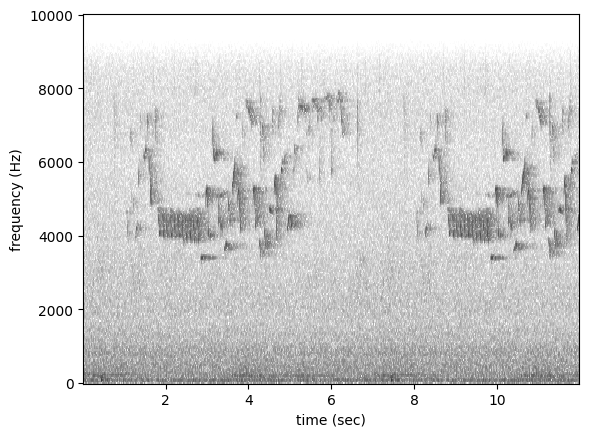

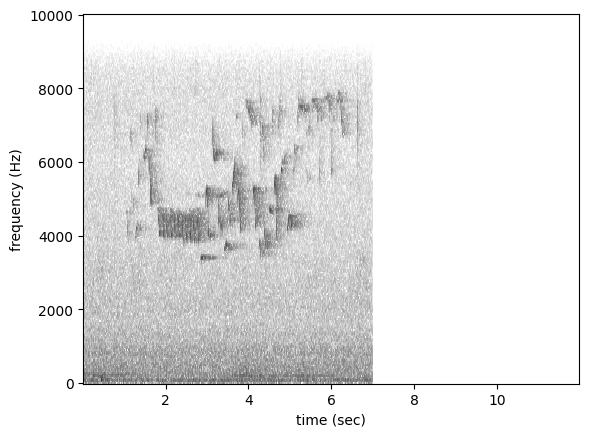

In [15]:
# LOOP audio
looped_audio = audio_segment.loop(audio_segment.duration * 2 - 2)
Spectrogram.from_audio(looped_audio).plot()
# EXTEND audio
extended_audio = audio_segment.extend(audio_segment.duration * 2 - 2)
Spectrogram.from_audio(extended_audio).plot()

Now that we know a few simple commands for manipulating audio and reading its metadata, we'll take a look at other sound properties that can be viewed and edited with OpenSoundscape. For the second part of this tutorial, we'll use the Northern Parula recording mentioned in the beginning.

#### Viewing an audio containing a northern parula call

Let's see the song's spectrogram and view some other changes we can make to spectrogram and audio with OpenSoundscape - like changing frequency and sound intensity ranges!

In [16]:
# create Audio from file path
path = 'parula_2sec_call.WAV'
audio = Audio.from_file(path)

When creating a Spectrogram, we can adjust the sound level range by using the decibel_limits parameter, which determines the minimum and maximum "loudness" level (by default -100 and -20).

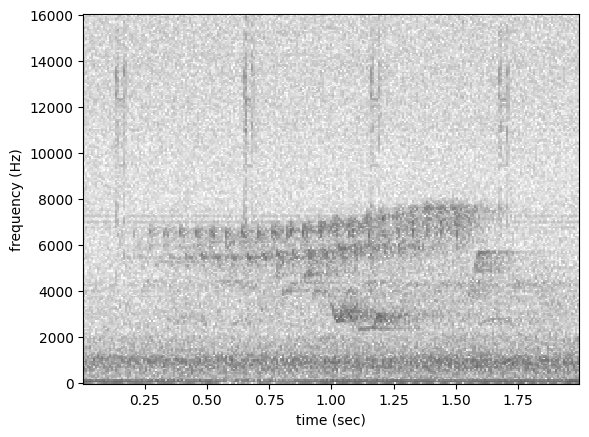

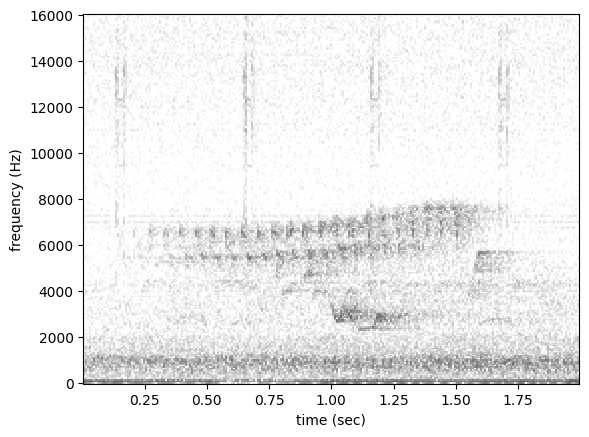

In [17]:
Spectrogram.from_audio(audio).plot()
Spectrogram.from_audio(audio, decibel_limits = (-80, -30)).plot()

In addition to the decibel range, we can change calculation parameters like the type (by default, Hanning), size (by default, 512), and overlap of FFT window used.

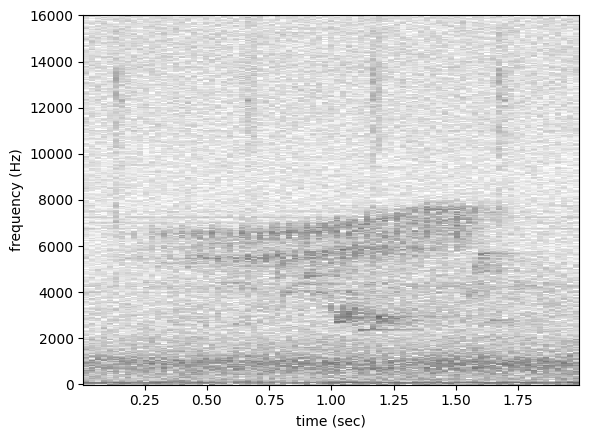

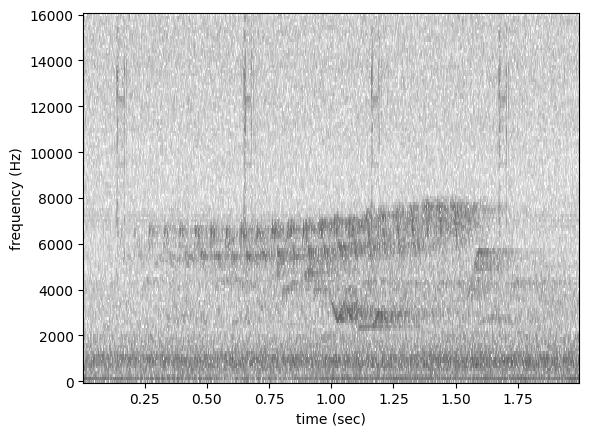

In [18]:
# Let's plot a couple spectrograms with different parameter values, varying the 
# number of samples in each FFT window (higher window size -> higher frequency resolution) and 
# the overlap fraction between windows (higher overlap -> higher resolution & higher generation time).
Spectrogram.from_audio(audio, window_samples = 1024, overlap_fraction = 0.25).plot()
Spectrogram.from_audio(audio, window_samples = 256, overlap_fraction = 0.75).plot()

Unlike with Audio objects, the bandpass command applied to a Spectrogram object will exclude all frequency bands outside of the given range from the plot without filtering or otherwise changing the existing data within the given frequency range.
Let's compare the results of bandpassing a Spectrogram and an Audio object.

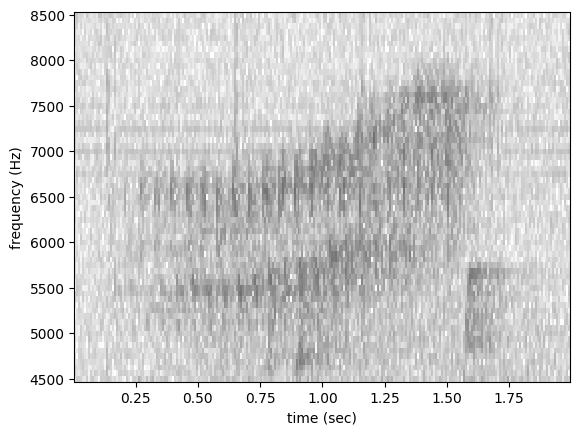

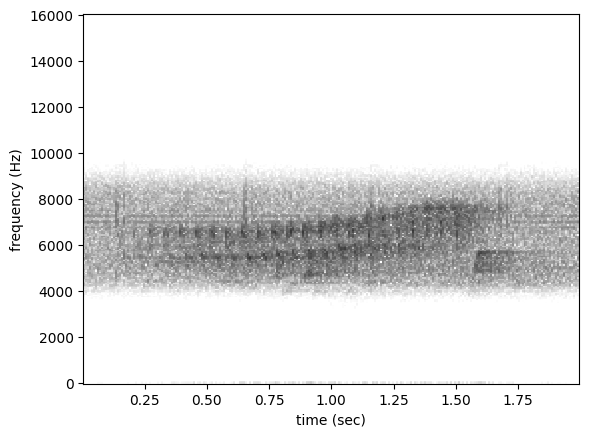

In [19]:
# Plot bandpassed spectrogam and bandpassed audio.
spec = Spectrogram.from_audio(audio).bandpass(4500, 8500)
spec.plot()
# Apply bandpass filter to our sound to exclude frequencies above 8000 Hz and below 2000 Hz.
bandpassed_audio = audio.bandpass(low_f = 4500, high_f = 8500, order = 5).normalize(0.1)
spec = Spectrogram.from_audio(bandpassed_audio)
spec.plot()

Frequency spectra can tell us a lot about an animal call as well. Here, we compare the frequency distribution of the entire audio and the bandpassed audio, which excludes noises occurring outside of the Northern Parula's frequency range.

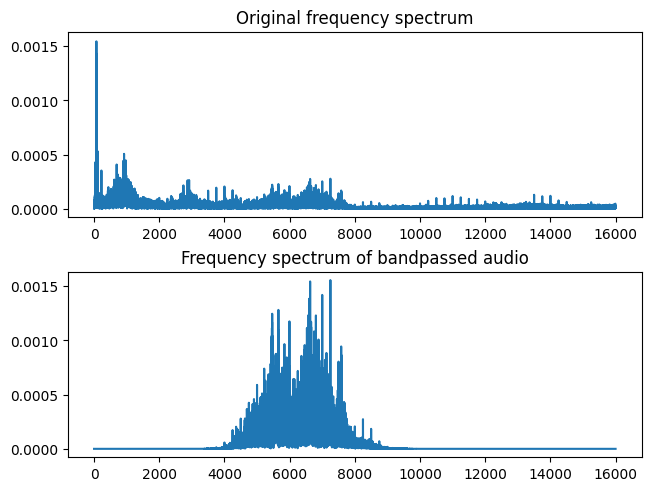

In [20]:
# Visualize the frequency spectrum for original and bandpassed audio.
fig, ax = plt.subplots(2, sharey = True, constrained_layout = True)
ax[0].plot(audio.spectrum()[1], audio.spectrum()[0])
ax[0].set_title('Original frequency spectrum')
ax[1].plot(bandpassed_audio.spectrum()[1], bandpassed_audio.spectrum()[0])
ax[1].set_title('Frequency spectrum of bandpassed audio')
plt.show()

With OpenSoundscape, we can manipulate Audio by adjusting (increasing or decreasing) gain and normalizing it by scaling the amplitude to a given point. In this example, we'll preview how both commands affect the sound's waveform.

Raw audio samples:
[-0.00369263 -0.00445557 -0.00656128 -0.00805664 -0.00720215 -0.01205444
 -0.00744629 -0.00701904 -0.0057373  -0.00476074]

Normalized audio:
[-0.00126042 -0.00152083 -0.00223958 -0.00275    -0.00245833 -0.00411458
 -0.00254167 -0.00239583 -0.00195833 -0.001625  ]

Audio with added 8 dB gain:
[-0.00927546 -0.01119188 -0.01648119 -0.02023737 -0.01809098 -0.03027939
 -0.01870423 -0.01763104 -0.01441146 -0.01195844]




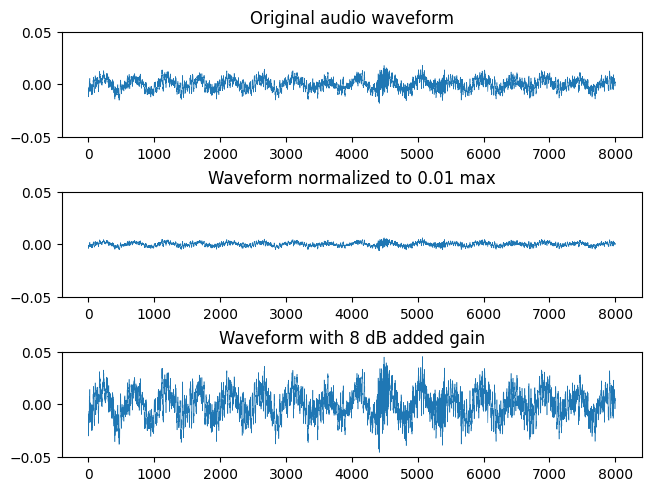

In [21]:
# Preview first 10 points of raw audio data.
print(f"Raw audio samples:\n{audio.samples[:10]}\n")
# Now let's adjust the audio parameters! Normalize the loaded audio file to even out its volume.
modified_audio1 = audio.normalize(0.01)
print(f"Normalized audio:\n{modified_audio1.samples[:10]}\n")
# Apply new gain setting.
modified_audio2 = audio.apply_gain(dB = +8)
print(f"Audio with added 8 dB gain:\n{modified_audio2.samples[:10]}\n\n")
# Visualize audio samples over time
fig, ax = plt.subplots(3, sharey=True, constrained_layout = True)
ax[0].plot(audio.samples[:8000], linewidth = 0.4)
ax[0].set_title('Original audio waveform')
ax[1].plot(modified_audio1.samples[:8000], linewidth = 0.4)
ax[1].set_title('Waveform normalized to 0.01 max')
ax[2].plot(modified_audio2.samples[:8000], linewidth = 0.4)
ax[2].set_title('Waveform with 8 dB added gain')
plt.show()

Using the Spectrogram module, we are also able to plot one-dimensional amplitude level against time.

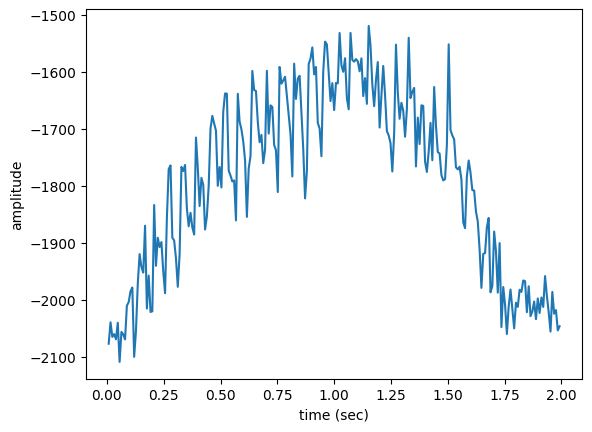

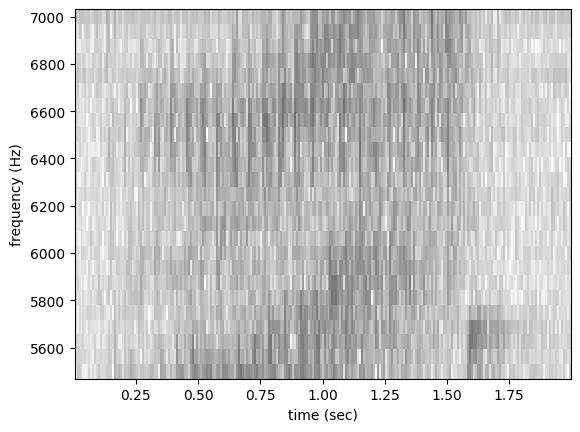

In [22]:
spec = Spectrogram.from_audio(audio).bandpass(5500, 7000)
high_freq_amplitude = spec.amplitude()
plt.plot(spec.times,high_freq_amplitude)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
spec.plot()

Finally, OpenSoundscape makes it simple to save spectrograms as images that we can look at later!

In [23]:
# Convert our spectrogram to an image and save it!
spec = Spectrogram.from_audio(audio, window_samples = 256, overlap_fraction = 0.5)
spec.to_image().save('example_1.png')